# Experiment No: 01

# 1.Image Read

In [1]:
import os
import cv2

def read_images_from_folder(folder):
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        cv2.imshow(filename, img)
        cv2.waitKey(0)
        cv2.destroyWindow(filename)

# Example usage:
input_images_folder = 'input_images/'
read_images_from_folder(input_images_folder)


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:1261: error: (-27:Null pointer) NULL window: 'image1.jpg' in function 'cvDestroyWindow'


# 2.Image Resizing

In [ ]:
import os
import cv2

def resize_images(input_folder, output_folder, target_size):
    for filename in os.listdir(input_folder):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)
        resized_img = cv2.resize(img, target_size)
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, resized_img)

# Example usage:
input_folder = 'input_images/'
output_folder = 'resized_images/'
target_size = (300, 200)
resize_images(input_folder, output_folder, target_size)


# 3. Color Transform

In [ ]:
import os
import cv2

def apply_color_transform(input_folder, output_folder):
    for filename in os.listdir(input_folder):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)
        # Perform color transform (e.g., convert to grayscale)
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, gray_img)

# Example usage:
input_folder = 'input_images/'
output_folder = 'color_transformed_images/'
apply_color_transform(input_folder, output_folder)


# 4. Image Normalization

In [ ]:
import os
import cv2

def normalize_images(input_folder, output_folder):
    for filename in os.listdir(input_folder):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path).astype(float)
        # Perform normalization (e.g., min-max scaling)
        normalized_img = (img - img.min()) / (img.max() - img.min())
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, normalized_img * 255)

# Example usage:
input_folder = 'input_images/'
output_folder = 'normalized_images/'
normalize_images(input_folder, output_folder)


# 5. Image Filtering

In [ ]:
import os
import cv2

def filter_images(input_folder, output_folder):
    for filename in os.listdir(input_folder):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)
        # Apply image filtering (e.g., Gaussian blur)
        filtered_img = cv2.GaussianBlur(img, (5, 5), 0)
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, filtered_img)

# Example usage:
input_folder = 'input_images/'
output_folder = 'filtered_images/'
filter_images(input_folder, output_folder)


I. The Gaussian Filter: The Gaussian filter is a common smoothing filter that blurs and eliminates noise by convolving the picture with a Gaussian function.

II. Median Filter: The median filter replaces each pixel's value with the median value of its neighborhood. It is a non-linear filter. It successfully eliminates impulsive noise, sometimes known as "salt and pepper" noise, from a picture.

III. Bilateral Filter: The bilateral filter soothes a picture while keeping crucial edges. It is a non-linear, edge-preserving filter. When determining the filter weights, it takes both spatial distance and pixel intensity similarity into account.

IV. Sobel Operator: The Sobel operator computes an image's gradient and is an edge detection filter. It is frequently used to draw attention to steep gradients on edges.

V. The Laplacian of Gaussian (LoG): This filter combines the Laplacian and Gaussian filters. The Laplacian of the Gaussian function is convolved with an image to improve edges while lowering noise.

VI. High-Pass Filters: High-pass filters emphasize an image's edges and fine details by enhancing its high-frequency components. The Laplacian filter and the unsharp mask filter are two examples.

VII. Low-Pass Filters: Low-pass filters smooth or blur a picture by reducing the high-frequency components of the image. Examples of low-pass filters are the Gaussian and mean filters.

VIII. Morphological Filters: Based on the ideas of mathematical morphology, morphological filters are utilized for processes including erosion, dilation, opening, and closure. These filters work well at eliminating background noise, bridging holes, and separating related items.

IX. Anisotropic Diffusion: This method is utilized for edge-preserving smoothing and picture denoising. It blurs pixel values while keeping an image's important edges.

X. Adaptive Filters: Adaptive filters modify their settings according to the specifics of the local picture. They are helpful in situations when an image's spatial qualities fluctuate.

# Experiment No: 02

# Sementic Segmentation

# U-net Model

In [106]:
from tensorflow import keras
from tensorflow.keras import layers

def create_unet(input_shape=(256, 256, 3), num_classes=1):
  """
  Creates a U-Net model for semantic segmentation.

  Args:
      input_shape: Shape of the input image (height, width, channels).
      num_classes: Number of classes to segment.

  Returns:
      A compiled Keras model.
  """

  # Define the encoder path
  inputs = keras.Input(shape=input_shape)
  conv1 = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(inputs)
  conv1 = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(conv1)
  pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

  conv2 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(pool1)
  conv2 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(conv2)
  pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

  conv3 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(pool2)
  conv3 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(conv3)
  pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

  # Define the decoder path
  conv4 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(pool3)
  conv4 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(conv4)

  up5 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2))(conv4)
  concat5 = layers.concatenate([up5, conv3])
  conv5 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(concat5)
  conv5 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(conv5)

  up6 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2))(conv5)
  concat6 = layers.concatenate([up6, conv2])
  conv6 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(concat6)
  conv6 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(conv6)

  up7 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2))(conv6)
  concat7 = layers.concatenate([up7, conv1])
  conv7 = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(concat7)
  conv7 = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(conv7)

  outputs = layers.Conv2D(num_classes, (1, 1), activation="softmax")(conv7)

  model = keras.Model(inputs=inputs, outputs=outputs)

  # Compile the model
  model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  return model

# Example usage
model = create_unet(input_shape=(224, 224, 3), num_classes=10)  # Change these values as needed

model.save("unet_model.h5")


In [107]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the U-Net model
model = load_model("unet_model.h5")

# Function to perform semantic segmentation on an image
def semantic_segmentation(image_path, model):
    # Load the input image
    image = cv2.imread(image_path)
    
    # Preprocess the input image (resize, normalize pixel values, etc.)
    image = cv2.resize(image, (224, 224))  # Resize the image to match model's input shape
    image = image.astype('float32') / 255.0  # Normalize pixel values
    
    # Add a batch dimension for model prediction
    input_image = np.expand_dims(image, axis=0)
    
    # Predict the segmentation mask
    mask = model.predict(input_image)[0]
    
    # Post-process the segmentation mask (thresholding, color mapping, etc.)
    segmented_mask = np.argmax(mask, axis=-1)  # Get the class with highest probability
    segmented_mask = segmented_mask.astype('uint8') * 255  # Convert to binary mask
    
    return segmented_mask

# Path to the input image
image_path = "download5.jpg"  # Change this to the path of your input image

# Perform semantic segmentation on the input image
segmented_image = semantic_segmentation(image_path, model)

# Save the segmented image
output_path = "segmented_image.jpg"
cv2.imwrite(output_path, segmented_image)
print(f"Segmented image saved to: {output_path}")


1/1 [==============================] - 1s 820ms/step
Segmented image saved to: segmented_image.jpg


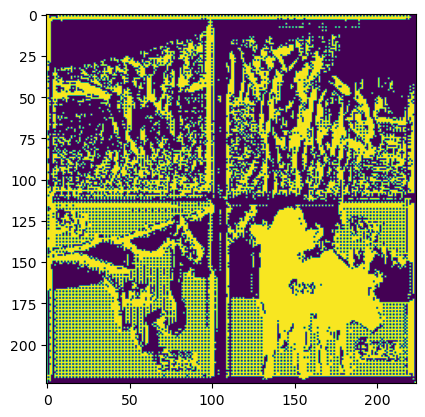

In [108]:


import matplotlib.pyplot as plt
plt.imshow(segmented_image)
plt.show()


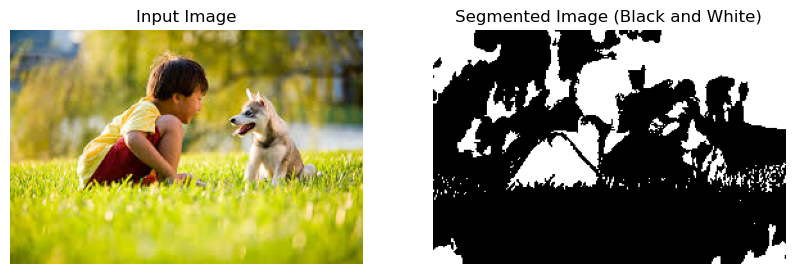

In [120]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image
input_image = cv2.imread("download3.jpg")  # Change this to the path of your input image

# Convert image to grayscale
gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank canvas for drawing contours
segmented_image = np.zeros_like(input_image)

# Draw contours on the blank canvas
cv2.drawContours(segmented_image, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Convert segmented image to grayscale
segmented_image_gray = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)

# Display input and segmented images side by side
plt.figure(figsize=(10, 5))

# Display input image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.axis('off')

# Display segmented image in black and white
plt.subplot(1, 2, 2)
plt.imshow(segmented_image_gray, cmap='gray')
plt.title('Segmented Image (Black and White)')
plt.axis('off')

plt.show()


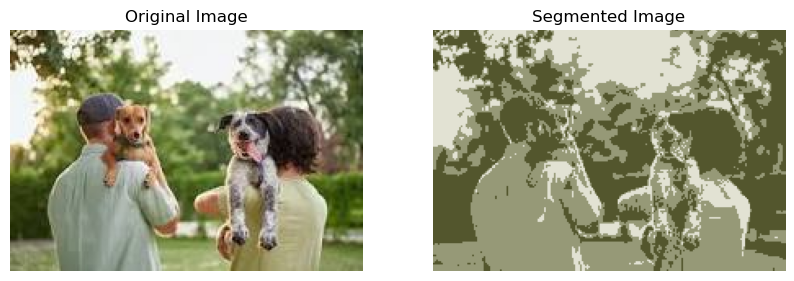

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('download1.jpg')

# Convert the image to a 1D array of RGB values
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array to match the shape of the original image
labels = labels.flatten()

# Replace each pixel value with its corresponding centroid value
segmented_image = centers[labels.flatten()]

# Reshape the segmented image to its original dimensions
segmented_image = segmented_image.reshape(image.shape)

# Display the original and segmented images using matplotlib
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Segmented image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image')
plt.axis('off')

plt.show()


# Experiment No: 03

Write a program to execute the following problem.
•	Given an image and a mask, determine the region of the image using the mask, compute the area of the region, then label the region by overlapping the mask over the image.


Image shape: (512, 512, 3)
Mask shape: (512, 512)
Area of the region: 11.86 square units


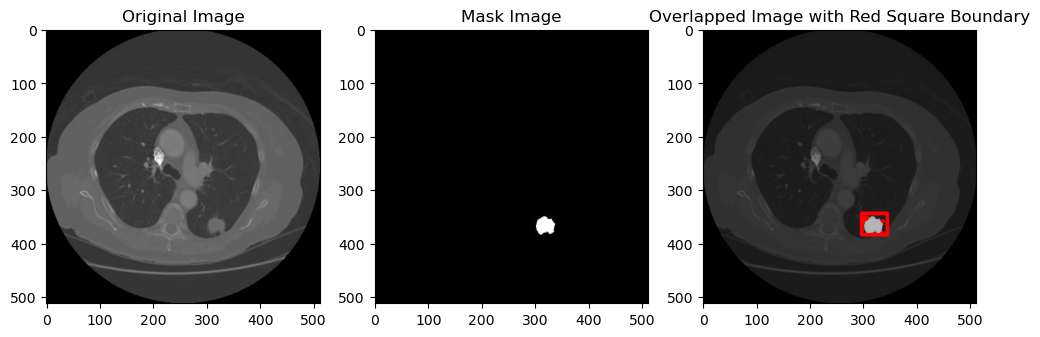

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and the mask
image = cv2.imread('main.jpg')
mask = cv2.imread('mask.jpg', cv2.IMREAD_GRAYSCALE)

# Verify if images are loaded correctly
print("Image shape:", image.shape)
print("Mask shape:", mask.shape)

# Define pixel size of the image (e.g., pixel_size = 0.01 for 1 cm x 1 cm pixel)
pixel_size = 0.01  # Example: Assuming each pixel corresponds to 1 square centimeter

# Determine the region of interest in the image using the mask
region_of_interest = cv2.bitwise_and(image, image, mask=mask)

# Compute the area of the region
pixel_area = np.sum(mask != 0)  # Count non-zero pixels in the mask
area = pixel_area * pixel_size
print("Area of the region:", area, "square units") 

# Label the region by overlapping the mask over the image
labeled_image = cv2.addWeighted(image, 0.5, cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR), 0.5, 0)

# Find contours of the region of interest
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw a red square boundary around each contour
for contour in contours:
    # Get the bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(contour)
    # Draw a red square around the bounding rectangle
    cv2.rectangle(labeled_image, (x, y), (x + w, y + h), (0, 0, 255), 5)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Display the original image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')

# Display the mask image
axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Mask Image')

# Display the overlapped image with boundary
axes[2].imshow(cv2.cvtColor(labeled_image, cv2.COLOR_BGR2RGB))
axes[2].set_title('Overlapped Image with Red Square Boundary')

plt.show()


# Experiment No:04

Write a program to execute the following image enhancement:
•	Basic Intensity Transformation (Negation, Log transformation, Power low transformation and Piece-wise linear transformation).
•	Convolution (High pass, Low pass and Laplacian filter)


# Basic Intensity Transformation:

Negation:

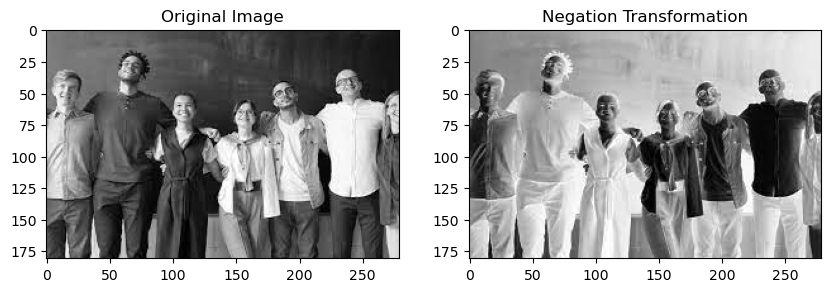

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('download.jpg', cv2.IMREAD_GRAYSCALE)

# Negation transformation
negation_image = 255 - image

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(negation_image, cmap='gray')
plt.title('Negation Transformation')
plt.show()


Log Transformation:

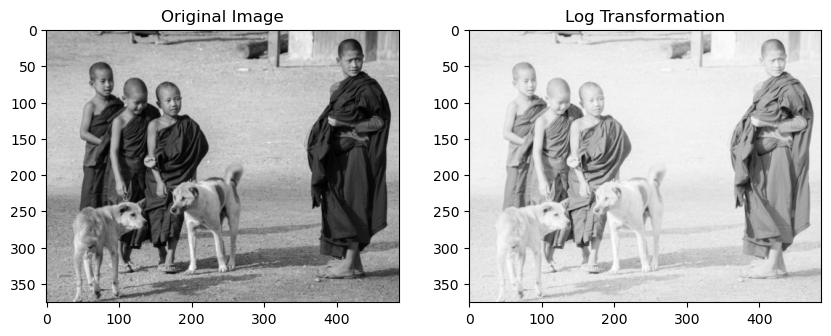

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('original_image.jpg', cv2.IMREAD_GRAYSCALE)

# Log transformation
c = 255 / np.log(1 + np.max(image))
log_image = c * (np.log(image + 1))

# Normalize the image
log_image = np.uint8(log_image)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(log_image, cmap='gray')
plt.title('Log Transformation')
plt.show()


Power Law Transformation:

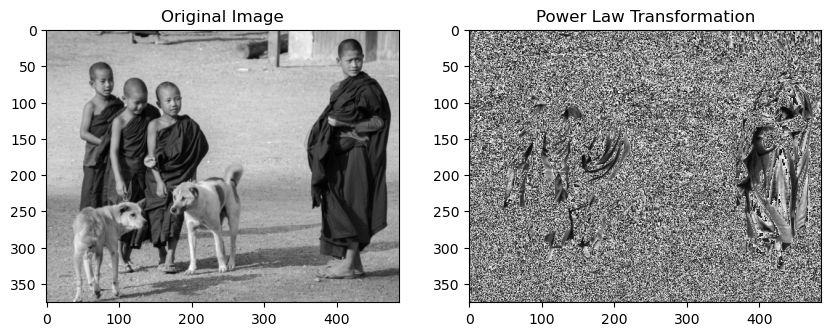

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('original_image.jpg', cv2.IMREAD_GRAYSCALE)

# Power law transformation
gamma = 1.5
power_law_image = np.power(image, gamma)

# Normalize the image
power_law_image = np.uint8(power_law_image)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(power_law_image, cmap='gray')
plt.title('Power Law Transformation')
plt.show()


Piece-wise Linear Transformation:

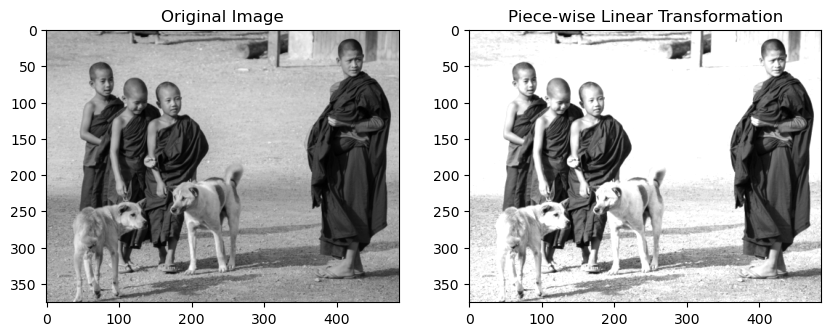

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('original_image.jpg', cv2.IMREAD_GRAYSCALE)

# Piece-wise linear transformation
piecewise_image = np.zeros_like(image)
piecewise_image = cv2.addWeighted(image, 0.5, piecewise_image, 0, 0)
piecewise_image = cv2.addWeighted(image, 1.5, piecewise_image, 0, 0)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(piecewise_image, cmap='gray')
plt.title('Piece-wise Linear Transformation')
plt.show()


# Convolution:

High Pass Filter (Sharpening):

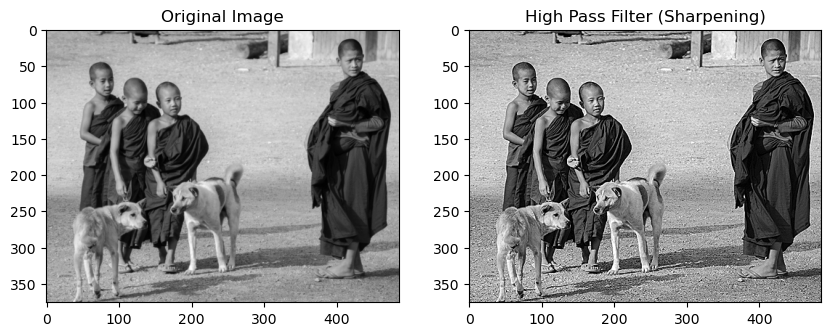

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('original_image.jpg', cv2.IMREAD_GRAYSCALE)

# Define the high pass filter kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Apply the high pass filter
high_pass_image = cv2.filter2D(image, -1, kernel)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(high_pass_image, cmap='gray')
plt.title('High Pass Filter (Sharpening)')
plt.show()


Low Pass Filter (Smoothing):

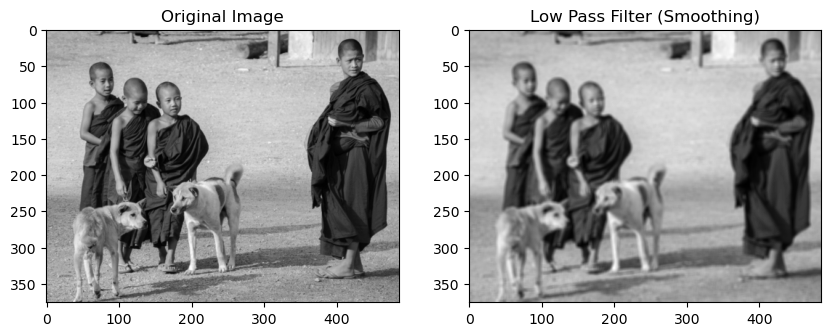

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('original_image.jpg', cv2.IMREAD_GRAYSCALE)

# Define the low pass filter kernel
kernel = np.ones((5, 5), np.float32) / 25

# Apply the low pass filter
low_pass_image = cv2.filter2D(image, -1, kernel)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(low_pass_image, cmap='gray')
plt.title('Low Pass Filter (Smoothing)')
plt.show()


Laplacian Filter:

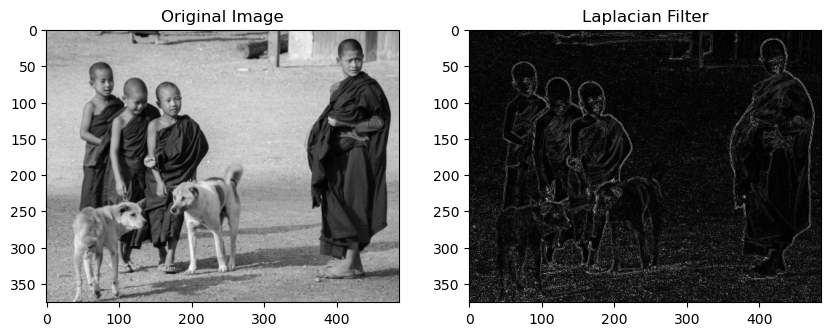

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('original_image.jpg', cv2.IMREAD_GRAYSCALE)

# Apply the Laplacian filter
laplacian_image = cv2.Laplacian(image, cv2.CV_64F)

# Normalize the image
laplacian_image = cv2.convertScaleAbs(laplacian_image)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(laplacian_image, cmap='gray')
plt.title('Laplacian Filter')
plt.show()


# Experiment No: 05

Write a program to execute the following edge detections
•	Canny edge detection
•	Prewitt edge detection
•	Sobel edge detection


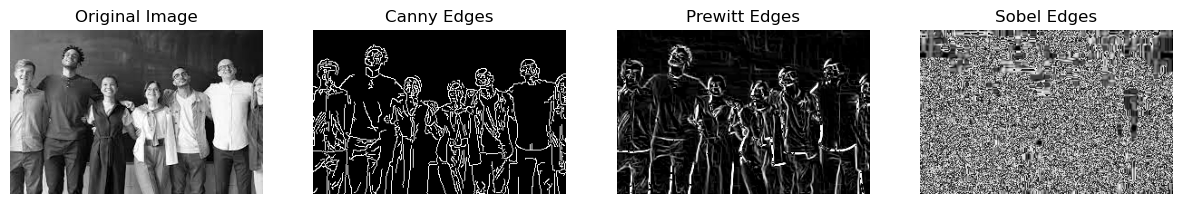

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('download.jpg', cv2.IMREAD_GRAYSCALE)

# Canny edge detection
canny_edges = cv2.Canny(image, 100, 200)

# Prewitt edge detection
kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_edges_x = cv2.filter2D(image, -1, kernelx)
prewitt_edges_y = cv2.filter2D(image, -1, kernely)
prewitt_edges = cv2.magnitude(prewitt_edges_x.astype(np.float64), prewitt_edges_y.astype(np.float64))

# Sobel edge detection
sobel_edges_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_edges_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_edges = cv2.magnitude(sobel_edges_x, sobel_edges_y)

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(prewitt_edges.astype(np.uint8), cmap='gray')
plt.title('Prewitt Edges')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(sobel_edges.astype(np.uint8), cmap='gray')
plt.title('Sobel Edges')
plt.axis('off')

plt.show()


# Experiment No: 10

Write a program to estimate pitch of a speech signal.

In [2]:
import wave
import numpy as np
import librosa
from scipy.io import wavfile

def estimate_pitch(signal, sr):
    # Get the autocorrelation of the signal
    autocorr = librosa.autocorrelate(signal)

    # Get the fundamental frequency (pitch) using the autocorrelation
    fundamental_freq = librosa.pitch_tuning(autocorr)

    return fundamental_freq


# Load the speech signal using wavefile.read
fs, signal = wavfile.read("sample.wav")

# Estimate the pitch
pitch = estimate_pitch(signal, fs)

print("Estimated fundamental frequency (pitch): {:.2f} Hz".format(pitch))


C:\Users\DELL\AppData\Local\Temp\ipykernel_9340\3467794251.py:17: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, signal = wavfile.read("sample.wav")


SystemError: initialization of _internal failed without raising an exception

In [ ]:
!pip install --upgrade numba librosa

